
# Delete stations from metadata

This script is used to cleanup stations, which we do not want to include furthermore.  

Reasons:
- No location (`NaN` / `inf`)


In [5]:
import numpy as np
import pandas as pd
import pyproj

from camelsp import get_metadata, Station


In [3]:
# Get metadata
metadata = get_metadata()
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,81.219178,32.186301
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,62.208219,59.876712
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,97.230137,32.186301
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,31.186301,35.189041
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,58.205479,52.032877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178
2866,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726
2867,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438
2868,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055


### Delete stations where we have no location

In [6]:
# filter metadata where lon or lar is nan
metadata = metadata[~(metadata['lon'].isna() | metadata['lat'].isna())]
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,81.219178,32.186301
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,62.208219,59.876712
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,97.230137,32.186301
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,31.186301,35.189041
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,58.205479,52.032877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178
3006,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726
3007,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438
3008,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055


In [7]:
# filter metadata where lon or lar is inf
metadata = metadata[~(metadata['lon'].isin([np.inf, -np.inf]) | metadata['lat'].isin([np.inf, -np.inf]))]
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,81.219178,32.186301
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,62.208219,59.876712
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,97.230137,32.186301
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,31.186301,35.189041
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,58.205479,52.032877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178
3006,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726
3007,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438
3008,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055


### Plot all stations to see if any stations are "off" / outside of Germany

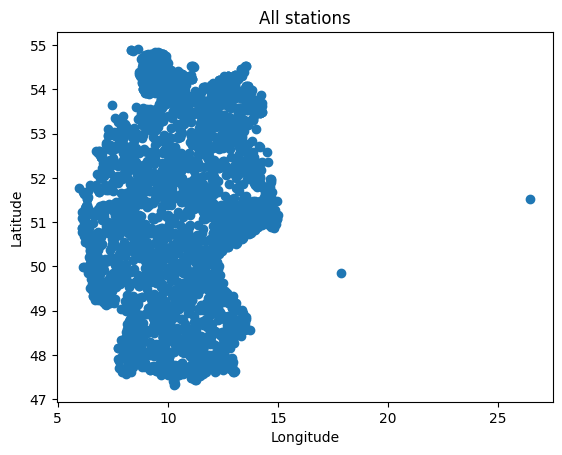

In [8]:
# plot all stations on map
import matplotlib.pyplot as plt

plt.scatter(metadata['lon'], metadata['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All stations')
plt.show()


In [9]:
# get the two station with maximum longitude
metadata[metadata['lon'] >= metadata['lon'].sort_values(ascending=False).iloc[1]]

# get the second largest longitude
# metadata[metadata['lon'] == metadata['lon'].sort_values(ascending=False).iloc[1]]


,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years
1070,DEB10440,2718085500,./DEB/DEB10440/DEB10440_data.csv,DEB,Rheinland-Pfalz,Niederadenau,Adenauer Bach,221.982,57.03,4.886258e+06,3.000322e+06,17.874741,49.842265,2919.0,2919.0,8.005479,8.005479
1875,DE812120,59607.3,./DE8/DE812120/DE812120_data.csv,DE8,Mecklenburg Vorpommern,Plau,Gerinne,60.060,1230.00,5.453414e+06,3.284893e+06,26.475180,51.516893,4017.0,4017.0,10.002740,9.002740


Two stations are located outside of Germany, which is obviously an error.  

Correct that error by hand!


Starting with station `DEB10440` in Rheinland-Pfalz, I found the location on this [website](https://www.aw-wiki.de/index.php/Pegel_Adenauer_Bach_(Niederadenau)), when right-clicking on the icon the displayed map.  
- lon: 6.93165
- lat: 50.435469

I just overwrite X, Y, lon and lat in the metadata with this values.

In [10]:
# Define the source and target coordinate systems
source_crs = "EPSG:4326"  # WGS84
target_crs = "EPSG:31466"  # DHDN / 3-degree Gauss-Kruger zone 2

# Create a transformer object
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Define the original coordinates
lon = 6.93165
lat = 50.435469

# Convert the coordinates
x, y = transformer.transform(lon, lat)

print(f"Converted coordinates: {x}, {y}")

Converted coordinates: 2566233.4287766777, 5589261.994987712


In [11]:
# overwrite the lon and lat where camels_id==DEB10440 with the transformed coordinates
metadata.loc[metadata['camels_id'] == 'DEB10440', ['lon', 'lat']] = lon, lat
metadata.loc[metadata['camels_id'] == 'DEB10440', ['x', 'y']] = x, y

metadata[metadata['camels_id'] == 'DEB10440']

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years
1070,DEB10440,2718085500,./DEB/DEB10440/DEB10440_data.csv,DEB,Rheinland-Pfalz,Niederadenau,Adenauer Bach,221.982,57.03,2.566233e+06,5.589262e+06,6.93165,50.435469,2919.0,2919.0,8.005479,8.005479


Now we go for `DE812120` (Pegel Plau). For this particular gauge, I cannot find a definitive location. There are some Pegel Plau in the metadata.  
The one with the wrong location is with Gewässer 'Gerinne', which sounds not that important.  
Data coverage is also only 9 years with some weird jumps.  

--> Decided to delete this Pegel entirely, as it is not clear what to do with it.

In [12]:
meta = pd.read_csv('../output_data/raw_metadata/DE8_raw_metadata.csv')
meta.iloc[210:213]

,pegelkennzahl,bezeichnung,gewaesser,rechtswert,hochwert,fg_einheit,gebietskennzahl,pnp,pnp_system,vorgaengerpegel,einzugsgebiet,gewaesserkennzahl,start_jahr,end_jahr
210,59607.0,Plau,Plauer See,318153,5926577,1,5925990000,60.00,-,NaN,1200.0,5.920000e+09,1957.0,1977.0
211,59607.1,Plau OP,Müritz-Elde-Wstr.,318153,5926577,3,5927131000,60.16,DHHN92,NaN,1230.0,5.920000e+09,1957.0,2020.0
212,59607.3,Plau,Gerinne,1295000,5770000,1,0,60.06,-,NaN,1230.0,NaN,1978.0,1987.0


<Axes: xlabel='date'>

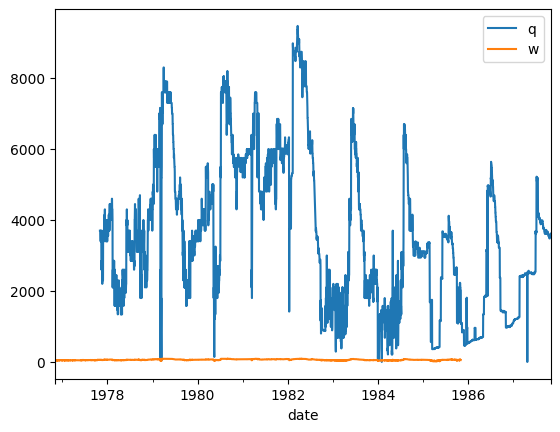

In [13]:
Station('DE812120').get_data().plot()

In [14]:
# delete station from metadata
metadata = metadata[metadata['camels_id'] != 'DE812120']
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,81.219178,32.186301
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,62.208219,59.876712
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,97.230137,32.186301
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,31.186301,35.189041
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,58.205479,52.032877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178
3006,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726
3007,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438
3008,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055


## Add any further cleanup here

- negative values in q and w -> what do we do?

In [19]:
meta = get_metadata()
camels_ids = meta['camels_id'].to_list()

ids_with_negative_values = []

for camels_id in camels_ids:
    neg = False

    s = Station(camels_id)
    
    df = s.get_data()
    
    # check if there are numbers < 0 in q and w columns, ignore nan
    if 'q' in df.columns:
        if (df['q'] < -0).any():
            neg = True
    if 'w' in df.columns:
        if (df['w'] < -0).any():
            neg = True
    if neg:
        ids_with_negative_values.append(camels_id)

print(f"Number of stations with negative values: {len(ids_with_negative_values)}")

Number of stations with negative values: 114


There are 114 stations with negative values.  
As negative values can be explainable, we do not simply delete all of these stations.  
I have to check all of this stations manually to see if the data looks okay...

In [34]:
import plotly.graph_objects as go

delete_ids = []

for camels_id in ids_with_negative_values:
    s = Station(camels_id)

    df = s.get_data()
    
    neg_q = False
    neg_w = False

    fig = go.Figure()

    # check if there are numbers < 0 in q and w columns, ignore nan
    if 'q' in df.columns:
        if (df['q'] < -0).any():
            neg_q = True
            
            # plot q
            fig.add_trace(go.Scatter(x=df.index, y=df['q'], mode='lines'))
            fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()}")
    if 'w' in df.columns:
        if (df['w'] < -0).any():
            neg_w = True
            # plot w
            fig.add_trace(go.Scatter(x=df.index, y=df['w'], mode='lines'))
            fig.update_layout(title=f"{s.name} --- min w: {df['w'].min()}")

    if neg_q and neg_w:
        fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()} --- min w: {df['w'].min()}")

    fig.show()

    # user input to delete station
    delete = input("Delete station? (y/n)")
    if delete == 'y':
        delete_ids.append(camels_id)
        
        # update title
        fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()} --- min w: {df['w'].min()} --- DO delete")
    
    elif delete == 'n':
        # clear plot
        fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()} --- min w: {df['w'].min()} --- DO NOT delete")
    
    elif delete == 'stop':
        break
    
    from IPython.display import clear_output
    clear_output(wait=True)
    continue


KeyError: 'w'

In [35]:
delete_ids

['DEF13000',
 'DEF14570',
 'DE811090',
 'DE811100',
 'DE811110',
 'DE811570',
 'DE811820']

# RALF: Bei manchen Stationen sind negative Werte klar Messfehler (Zacken nach unten)

Sollen wir diese Werte dann mit NaN ersetzen??

## Save new metadata

In [16]:
# save metadata
metadata = metadata.reset_index(drop=True)
metadata.to_csv('../output_data/metadata/metadata.csv', index=False)

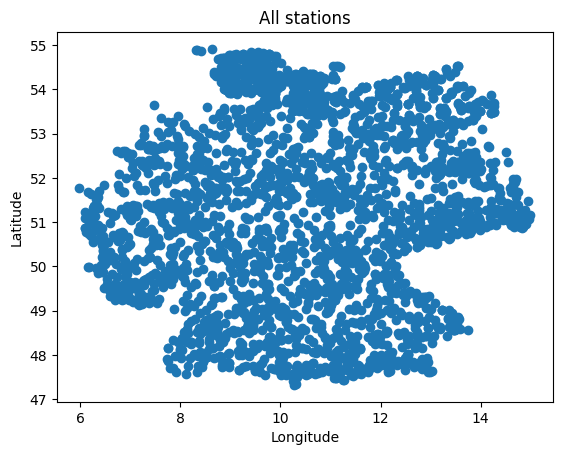

In [17]:
# plot all stations on map
import matplotlib.pyplot as plt
metadata = get_metadata()

plt.scatter(metadata['lon'], metadata['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All stations')
plt.show()
